Product-wise sum and average of Qty:
              sum      mean
ProductName               
Pen           56  9.333333
Pencil        40  6.666667

Total sales by each salesman:
 Name
Amit      120
Bina       25
Chetan     80
Deepa      75
Esha       70
Farhan     15
Gita      200
Hari       10
Indu       50
Jaya       45
Kiran      40
Leela      30
Name: TotalSales, dtype: int64

Salesman not from Mangalore and TotalSales < 100000:
       Name       City  TotalSales
0     Amit  Bangalore         120
2   Chetan     Mysore          80
3    Deepa  Bangalore          75
5   Farhan     Mysore          15
6     Gita  Bangalore         200
8     Indu     Mysore          50
9     Jaya  Bangalore          45
11   Leela     Mysore          30

Salesman from any 3 cities with total qty < 10:
       Name  Qty
1     Bina    5
2   Chetan    8
4     Esha    7
5   Farhan    3
7     Hari    2
8     Indu    5
9     Jaya    9
10   Kiran    4
11   Leela    6

First 10 rows:
    Slno    Name       City Pro

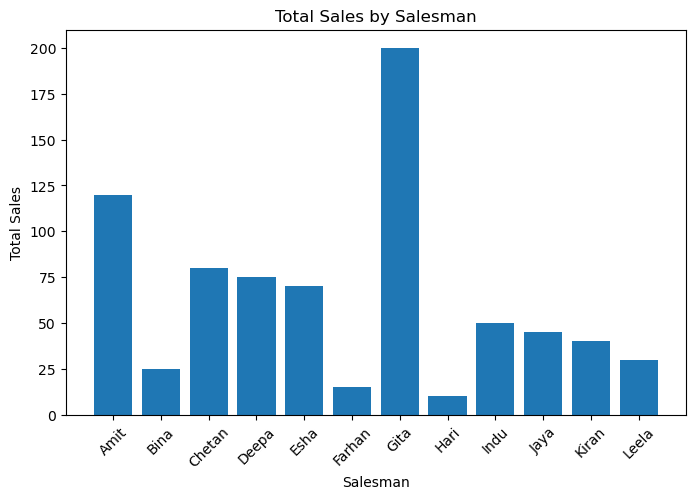

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data dictionary
data = {
    'Slno': [1,2,3,4,5,6,7,8,9,10,11,12],
    'Name': ['Amit','Bina','Chetan','Deepa','Esha','Farhan','Gita','Hari','Indu','Jaya','Kiran','Leela'],
    'City': ['Bangalore','Mangalore','Mysore','Bangalore','Mangalore','Mysore','Bangalore','Mangalore','Mysore','Bangalore','Mangalore','Mysore'],
    'ProductName': ['Pen','Pencil','Pen','Pencil','Pen','Pencil','Pen','Pencil','Pen','Pencil','Pen','Pencil'],
    'Qty': [12,5,8,15,7,3,20,2,5,9,4,6],
    'Price': [10,5,10,5,10,5,10,5,10,5,10,5]
}

# Create DataFrame
df = pd.DataFrame(data)

# i. Sort by City (asc) and ProductName (desc)
sorted_df = df.sort_values(by=['City', 'ProductName'], ascending=[True, False])

# ii. Average and sum of product sold Product name-wise
product_stats = df.groupby('ProductName')['Qty'].agg(['sum', 'mean'])
print("Product-wise sum and average of Qty:\n", product_stats)

# iii. Sum of Total sales done by each salesman
df['TotalSales'] = df['Qty'] * df['Price']
salesman_sales = df.groupby('Name')['TotalSales'].sum()
print("\nTotal sales by each salesman:\n", salesman_sales)

# iv. Add new column TotalSales (already added above)

# v. Salesman not from Mangalore and TotalSales < 100000
filtered_df = df[(df['City'] != 'Mangalore') & (df['TotalSales'] < 100000)]
print("\nSalesman not from Mangalore and TotalSales < 100000:\n", filtered_df[['Name', 'City', 'TotalSales']])

# vi. Salesman from any 3 cities and their total qty < 10
cities = df['City'].unique()[:3]  # pick any 3 cities
city_qty = df[df['City'].isin(cities)].groupby('Name')['Qty'].sum().reset_index()
city_qty_filtered = city_qty[city_qty['Qty'] < 10]
print("\nSalesman from any 3 cities with total qty < 10:\n", city_qty_filtered)

# Display first 10 and last 5 rows
print("\nFirst 10 rows:\n", df.head(10))
print("\nLast 5 rows:\n", df.tail(5))

# Bar chart for total sales
plt.figure(figsize=(8,5))
plt.bar(df['Name'], df['TotalSales'])
plt.xlabel('Salesman')
plt.ylabel('Total Sales')
plt.title('Total Sales by Salesman')
plt.xticks(rotation=45)
plt.show()